## **Import Libraries**

In [ ]:
import math
import datetime
import numpy as np 
import pandas as pd
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

# Dimensionality Reduction Methods
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Scaling
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn import model_selection
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Feature selection modules
from sklearn.feature_selection import mutual_info_classif,RFE,RFECV
from sklearn.feature_selection import mutual_info_regression

# Classification modules
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Regression modules
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor

# Evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error, r2_score

# Split methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold as cross_valid_kfold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold  as cross_valid_stratified_kf
from sklearn.model_selection import StratifiedShuffleSplit

#Smote
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
seed=42

!pip install plotly
import plotly.graph_objs as plt_go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, plot, iplot

import warnings
warnings.filterwarnings('ignore')

## **Fetch Dataset**

>#### The dataset is downloaded from Kaggle and stored on google drive due to its large size. Initially I have found out that there were no missing values however, this dataset is highly imbalanced.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
get_ds = "/content/drive/MyDrive/Colab Notebooks/ML-2/Project/creditcard.csv"

df = pd.read_csv(get_ds)
df.dropna(axis=0, inplace=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## **Data Preprocessing and Exploratory Data Analysis**

>#### After performing EDA, it is cleared that only 0.17% of the dataset is consisted of fraudulent information which is extremely difficult to predict and segregate its behaviour. Another problem is that among 31 fields only 3 are labeled while the rest of the fields are not just unlabeled but also transformed using PCA therefore, to understand their pattern and information they contain is impossible. 
>#### However, I have used graphs to understand the relaion between labeled predictors and target variable. Also, used heatmap correlation to identify most correlated features.
> #### Here, I have focused on both positive and negative correlation as it shows that the data is somewhat important for further analysis and training the model. These 16 features are selected manually from heatmap: V11, V4, V2, V20, Class, Amount, Time, V6, V5, V1, V7, V13, V3, V12, V14, V17

In [ ]:
total = df.isnull().sum()
percent = (total/df.isnull().count()*100)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# checking summary of data
print("Credit Card Fraud Detection - Total no .of rows:", df.shape[0]," columns:", df.shape[1])
df.describe()

Credit Card Fraud Detection - Total no .of rows: 284807  columns: 31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


No. of Normal Transactions 99.83 % of the dataset
No. of Fraudulent Transactions 0.17 % of the dataset


Text(0, 0.5, 'Class')

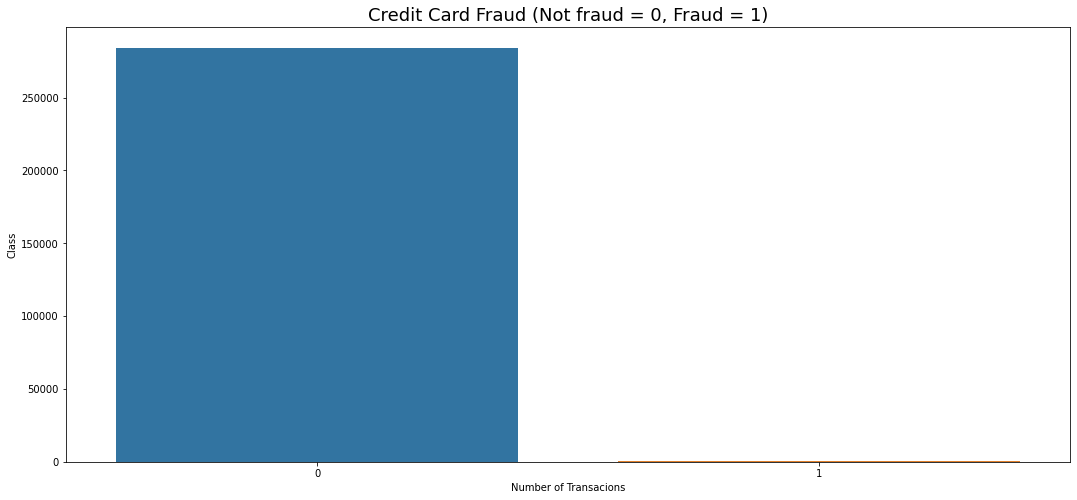

In [ ]:
temp = df["Class"].value_counts()
temp_df = pd.DataFrame({'Label': temp.index,'values': temp.values})

print('No. of Normal Transactions', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('No. of Fraudulent Transactions', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

f, ax = plt.subplots(figsize=(18, 8))
fig = sns.barplot(x=temp_df['Label'], y= temp_df['values'])
plt.title('Credit Card Fraud (Not fraud = 0, Fraud = 1)', fontsize = 18)
plt.xlabel('Number of Transacions')
plt.ylabel('Class')

Only 492 (or 0.172%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class.

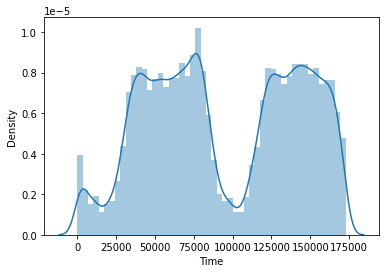

In [ ]:

fig = sns.distplot(df['Time'])

In [ ]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

hist_data = np.array([class_0, class_1])
group_labels = ['0', '1']
group_labels=np.array(group_labels)

fig = sns.lineplot(class_0,class_1)


In [ ]:
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))

tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
temp_df = pd.DataFrame(tmp)
temp_df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
temp_df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


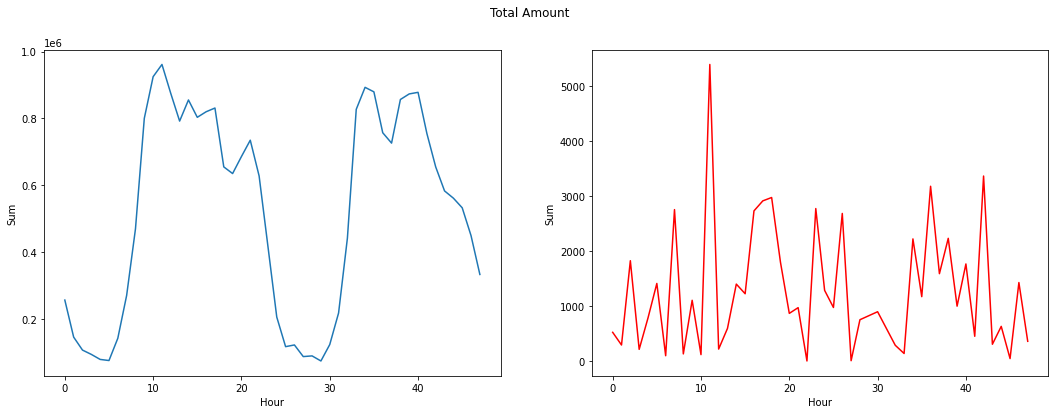

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Not Fraud - Hour", y="Sum", data=temp_df.loc[temp_df.Class==0])
s = sns.lineplot(ax = ax2, x="Fraud - Hour", y="Sum", data=temp_df.loc[temp_df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

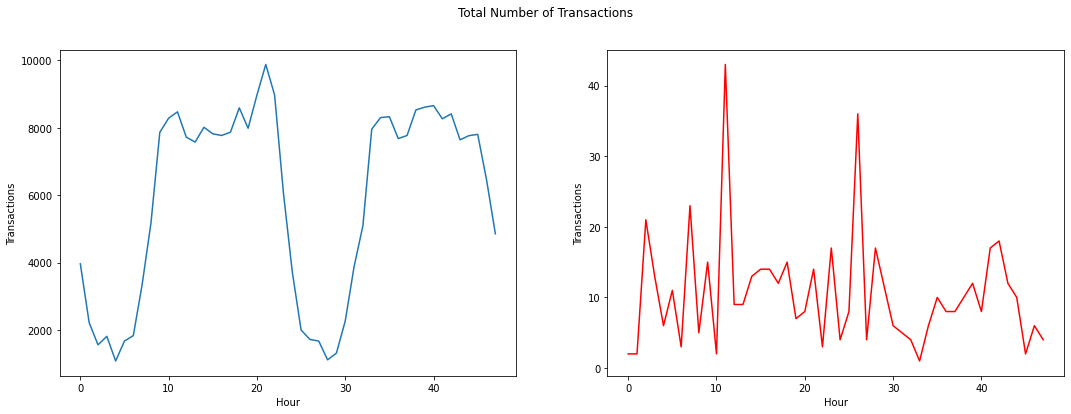

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Not Fraud - Hour", y="Transactions", data=temp_df.loc[temp_df.Class==0])
s = sns.lineplot(ax = ax2, x="Fraud - Hour", y="Transactions", data=temp_df.loc[temp_df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

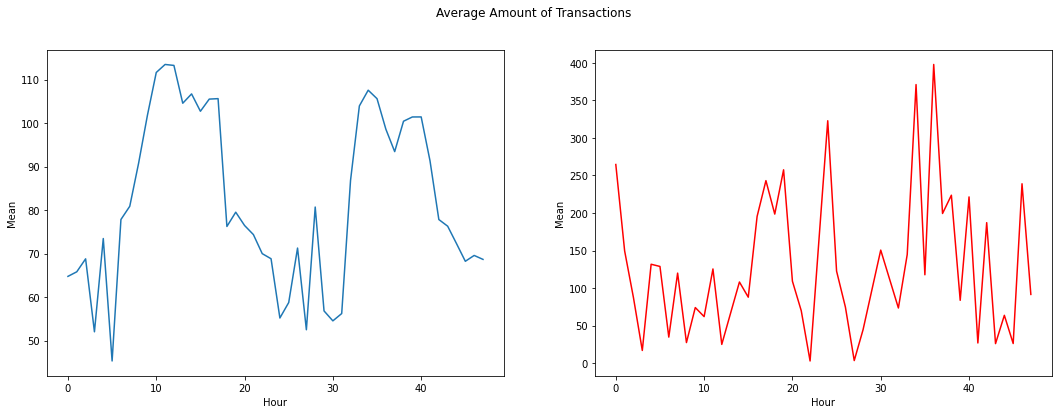

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Not Fraud - Hour", y="Mean", data=temp_df.loc[temp_df.Class==0])
s = sns.lineplot(ax = ax2, x="Fraud - Hour", y="Mean", data=temp_df.loc[temp_df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();

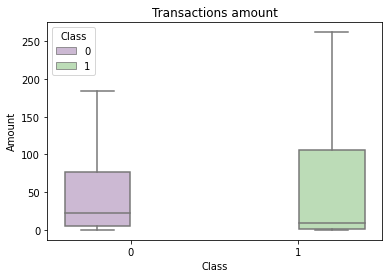

In [ ]:
# Transactions amount
fig = sns.boxplot( x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.title('Transactions amount')
plt.show();

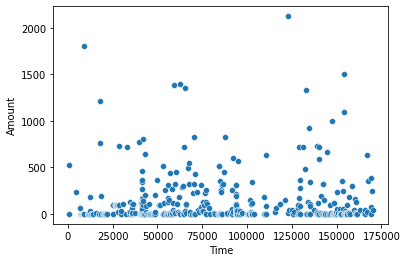

In [ ]:
fraud = df.loc[df['Class'] == 1]
fig =sns.scatterplot( x = fraud['Time'],y = fraud['Amount'])

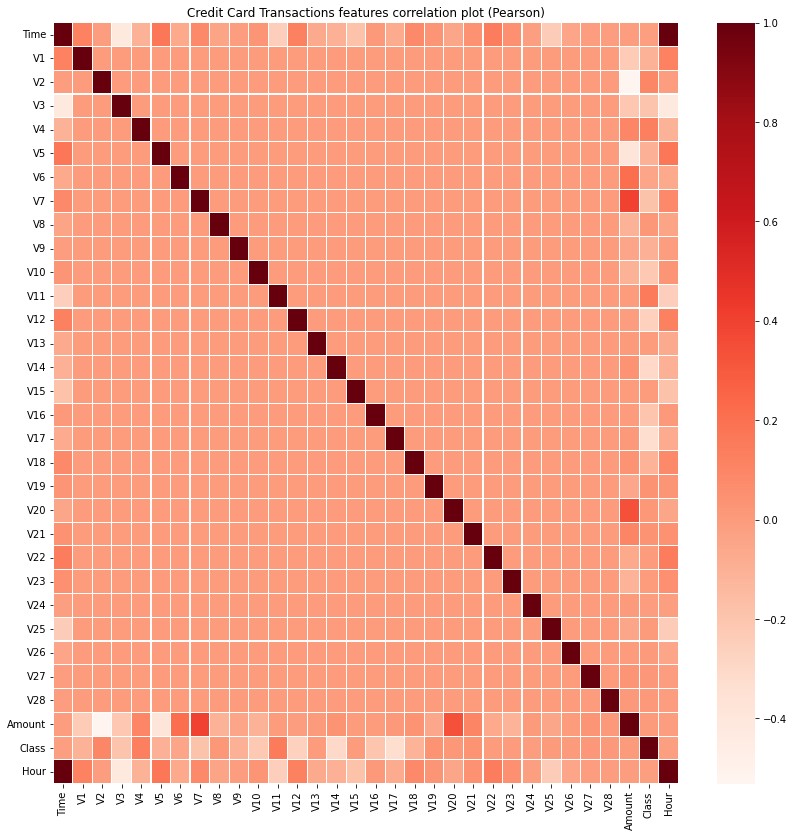

In [ ]:
#Heatmap

plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

['Class' 'V11' 'V4' 'V2' 'V21' 'V19' 'V20' 'V8' 'V27' 'V28' 'Amount' 'V26'
 'V25' 'V22' 'V23' 'V15' 'V13' 'V24' 'Time' 'Hour' 'V6' 'V5' 'V9' 'V1'
 'V18' 'V7' 'V3' 'V16' 'V10' 'V12' 'V14' 'V17']


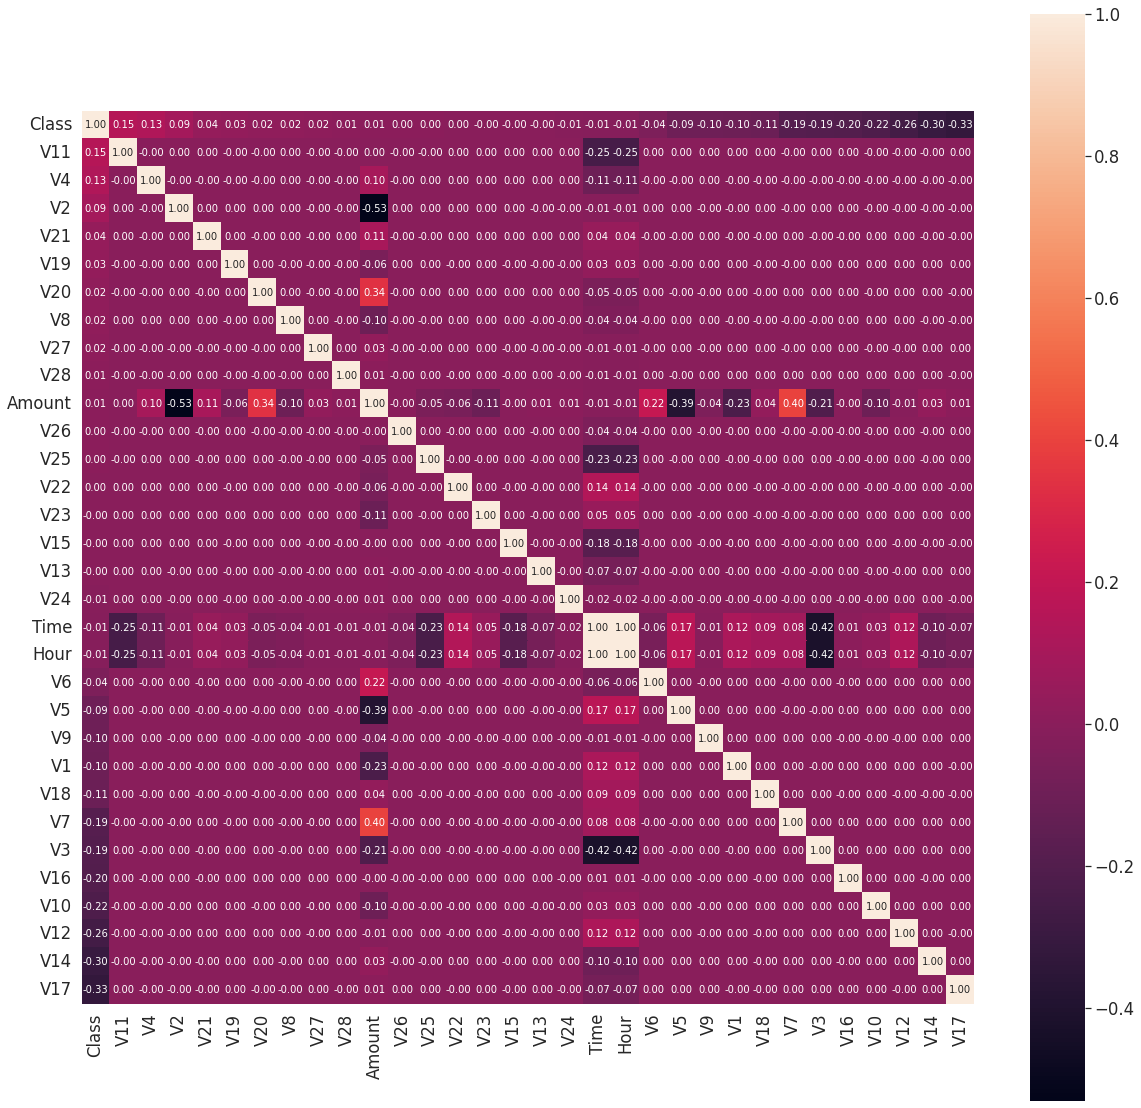

In [ ]:
k = 32 #number of variables for heatmap
imp_cols = corr.nlargest(k, 'Class')['Class'].index
print(imp_cols.values)
cm = np.corrcoef(df[imp_cols].values.T)
sns.set(font_scale=1.5)
plt.figure(figsize=(20,20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=imp_cols.values, xticklabels=imp_cols.values)
plt.show()

## **ML Algorithms**

### Evaluation Metrics

In [ ]:
# Validation metrics for classification
def validationmetrics(model, testX, testY, verbose=True):   
    predictions = model.predict(testX)
    
    if model.__class__.__module__.startswith('lightgbm'):
        for i in range(0, predictions.shape[0]):
            predictions[i]= 1 if predictions[i] >= 0.5 else 0
    
    #Accuracy
    accuracy = accuracy_score(testY, predictions)*100
    
    #Precision
    precision = precision_score(testY, predictions, pos_label=1, labels=[0,1])*100
    
    #Recall
    recall = recall_score(testY, predictions,pos_label=1,labels=[0,1])*100
    
    #get FPR (specificity) and TPR (sensitivity)
    fpr , tpr, _ = roc_curve(testY, predictions)
    
    #AUC
    auc_val = auc(fpr, tpr)
    
    #F-Score
    f_score = f1_score(testY, predictions)
    
    if verbose:
        print("Prediction Vector: \n", predictions)
        print("\n Accuracy: \n", accuracy)
        print("\n Precision of event Happening: \n", precision)
        print("\n Recall of event Happening: \n", recall)
        print("\n AUC: \n",auc_val)
        print("\n F-Score:\n", f_score)
        #confusion Matrix
        print("\n Confusion Matrix: \n", confusion_matrix(testY, predictions,labels=[0,1]))
    
    res_map = {
                "model_obj": model,
                "accuracy": accuracy,
                "precision": precision,
                "recall": recall,
                "auc_val": auc_val,
                "f_score": f_score
              }
    return res_map


#Validation metrics for Regression algorithms
def validationmetrics_reg(model,testX,testY, verbose=True):
    predictions = model.predict(testX)
    
    # R-squared
    r2 = r2_score(testY,predictions)
    
    # Adjusted R-squared
    r2_adjusted = 1-(1-r2)*(testX.shape[0]-1)/(testX.shape[0]-testX.shape[1]-1)
    
    # MSE
    mse = mean_squared_error(testY,predictions)
    
    #RMSE
    rmse = math.sqrt(mse)
    
    if verbose:
        print("R-Squared Value: ", r2)
        print("Adjusted R-Squared: ", r2_adjusted)
        print("RMSE: ", rmse)
    
    res_map = {
                "model_obj": model,
                "r2": r2,
                "r2_adjusted": r2_adjusted,
                "rmse": rmse
              }
    return res_map

### Classification Algorithms

In [ ]:
# Classification Algorithms

def LogReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf  = LogisticRegression()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def KNN(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = KNeighborsClassifier()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def GradientBoosting(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = GradientBoostingClassifier()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def AdaBoost(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def SVM(trainX, testX, trainY, testY, svmtype="SVC", verbose=True, clf=None):
    # for one vs all
    if not clf:
        if svmtype == "Linear":
            clf = svm.LinearSVC()
        else:
            clf = svm.SVC()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def DecisionTree(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = DecisionTreeClassifier()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def RandomForest(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf  = RandomForestClassifier()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def NaiveBayes(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = GaussianNB()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def XgBoost(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = XGBClassifier(random_state=1,learning_rate=0.01)
    clf.fit(trainX,trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def LightGbm(trainX, testX, trainY, testY, verbose=True, clf=None):
    d_train = lgb.Dataset(trainX, label=trainY)
    params = {}
    params['learning_rate'] = 0.003
    params['boosting_type'] = 'gbdt'
    params['objective'] = 'binary'
    params['metric'] = 'binary_logloss'
    params['sub_feature'] = 0.5
    params['num_leaves'] = 10
    params['min_data'] = 50
    params['max_depth'] = 10
    clf = lgb.train(params, d_train, 100)
    return validationmetrics(clf,testX,testY,verbose=verbose)


### Regression Algorithms

In [ ]:
# Regression Algorithms
    
def LinearReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf  = LinearRegression()
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)

def RandomForestReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = RandomForestRegressor(n_estimators=100)
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)

def PolynomialReg(trainX, testX, trainY, testY, degree=3, verbose=True, clf=None):
    poly = PolynomialFeatures(degree = degree)
    X_poly = poly.fit_transform(trainX)
    poly.fit(X_poly, trainY)
    if not clf:
        clf = LinearRegression() 
    clf.fit(X_poly, trainY)
    return validationmetrics_reg(clf, poly.fit_transform(testX), testY, verbose=verbose)

def SupportVectorRegression(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = SVR(kernel="rbf")
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)

def DecisionTreeReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = DecisionTreeRegressor()
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)

def GradientBoostingReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = GradientBoostingRegressor()
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)

def AdaBooostReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = AdaBoostRegressor(random_state=0, n_estimators=100)
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)

def VotingReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    lr = LinearRegression()
    rf = RandomForestRegressor(n_estimators=100)
    # sv = SVR(kernel="rbf")
    dt = DecisionTreeRegressor()
    # gb = GradientBoostingRegressor()
    ab = AdaBoostRegressor(random_state=0, n_estimators=100)
    if not clf:
        clf = VotingRegressor([('rf', rf), ('dt', dt), ('ab', ab)])
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)


### Helper Functions

In [ ]:
# Helper function to run all algorithms provided in algo_list over given dataframe, without cross validation

# Helper function to provide list of supported algorithms for Classification
def get_supported_algorithms():
    covered_algorithms = [LogReg, KNN, GradientBoosting, AdaBoost,
                          SVM, DecisionTree, RandomForest, NaiveBayes,
                          XgBoost] #LightGbm
    return covered_algorithms
    
# Helper function to provide list of supported algorithms for Regression
def get_supported_algorithms_reg():
    covered_algorithms = [LinearReg, RandomForestReg, SupportVectorRegression,
                          DecisionTreeReg, GradientBoostingReg, AdaBooostReg, VotingReg]
    return covered_algorithms

# Helper function to scale Amount and Time as these are the inly two variable which were not scaled.
def get_scaled_df(df):
  rob_sc = RobustScaler()
  scaled_amount = rob_sc.fit_transform(df['Amount'].values.reshape(-1,1))
  scaled_time = rob_sc.fit_transform(df['Time'].values.reshape(-1,1))

  df.insert(0, 'scaled_amount', scaled_amount)
  df.insert(1, 'scaled_time', scaled_time)

  # Amount and Time are Scaled so we are removing unsacled features!
  df.drop(['Time','Amount'], axis=1, inplace=True)
  
  return df

# By default it will run all supported algorithms 
def run_algorithms(df, label_col, algo_list, feature_list=[]):
    """
    Run Algorithms with manual split
    
    """
    # Lets make a copy of dataframe and work on that to be on safe side 
    _df = df.copy()
    
    if feature_list:
        impftrs = feature_list
        impftrs.append(label_col)
        _df = _df[impftrs]
    
    _df, trainX, testX, trainY, testY = traintestsplit(_df, 0.2, 91, label_col=label_col)
    algo_model_map = {}
    for algo in algo_list:
        print("============ " + algo.__name__ + " ===========")
        res = algo(trainX, testX, trainY, testY)
        algo_model_map[algo.__name__] = res.get("model_obj", None)
        print ("============================== \n")
    
    return algo_model_map
        


#Train Test Split: splitting manually
def traintestsplit(df,split,random=None, label_col=''):
    #make a copy of the label column and store in y
    y = df[label_col].copy()
    
    #now delete the original
    X = df.drop(label_col,axis=1)
    
    #manual split
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    return X, trainX, testX, trainY, testY

#helper function which only splits into X and y
def XYsplit(df, label_col):
    y = df[label_col].copy()
    X = df.drop(label_col,axis=1)
    return X,y



# With stratified kfold validation support
def run_algorithms_cv(df, label_col, algo_list, feature_list=[], cross_valid_method=None):
    """
    Run Algorithms with cross validation
    
    """
    _df = df.copy()
    X,y = XYsplit(_df, label_col)
    
    # Select features if specified by driver program
    if feature_list:
        X = X[feature_list]
   
    result = {}
    algo_model_map = {}
    for algo in algo_list:
        clf = None
        result[algo.__name__] = dict()
        # for trainX,trainY,testX,testY  in cross_valid_method(X, y, split=10):
        for train_index, test_index in cross_valid_method.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            res_algo = algo(X_train, X_test, y_train, y_test, verbose=False, clf=clf)
            # Get trained model so we could use it again in the next iteration
            clf = res_algo.get("model_obj", None)
            
            for k,v in res_algo.items():
                if k == "model_obj":
                    continue
                if k not in result[algo.__name__].keys():
                    result[algo.__name__][k] = list()
                result[algo.__name__][k].append(v)
                
        algo_model_map[algo.__name__] = clf
            
    score_map = dict()
    # let take average scores for all folds now
    for algo, metrics in result.items():
        print("============ " + algo + " ===========")
        score_map[algo] = dict()
        for metric_name, score_lst in metrics.items():
            score_map[algo][metric_name] = np.mean(score_lst)
        print(score_map[algo])
        print ("============================== \n")
        score_map[algo]["model_obj"] = algo_model_map[algo]
    
    return score_map


# Helper function to get fetaure importance metrics via Random Forest Feature Selection (RFFS)
def RFfeatureimportance(df, trainX, testX, trainY, testY, trees=35, random=None, regression=None):
    if regression:
        clf  = RandomForestRegressor(n_estimators=trees, random_state=random)
    else:
        clf  = RandomForestClassifier(n_estimators=trees, random_state=random)
    clf.fit(trainX,trainY)
    #validationmetrics(clf,testX,testY)
    res = pd.Series(clf.feature_importances_, index=df.columns.values).sort_values(ascending=False)*100
    print("Random Fores Feature Selections List: ", res)
    return res


# Helper function to select important features via RFFS, run supported ML algorithms over dataset with manual split and measure accuracy without Cross Validation - select features with importance >=threshold
def MachineLearningwithRFFS(df, label_col, threshold=5, algo_list=get_supported_algorithms(), regression=False):
    # lets create a copy of this dataframe and perform feature selection analysis over that
    df_cpy = df.copy()
    df_cpy, trainX, testX, trainY, testY = traintestsplit(df_cpy, 0.2, 91, label_col=label_col)
    res = RFfeatureimportance(df_cpy, trainX, testX, trainY, testY, trees=10, regression=regression)
    
    impftrs = list(res[res > threshold].keys())
    #impftrs.append(label_col)
    
    print ("Selected Features =" + str(impftrs))
    # print(df.shape)
    results = run_algorithms(df, label_col, algo_list=algo_list, feature_list=impftrs)
    return {"selected_features": impftrs, "results": results}


# Helper function to select important features via RFFS, run supported ML algorithms over dataset with cross validation and measure accuracy --- select features with importance >=threshold
def MachineLearningwithRFFS_CV(df, label_col, threshold, algo_list, regression):
    # lets create a copy of this dataframe and perform feature selection analysis over that
    df_cpy = df.copy()
    df_cpy = get_scaled_df(df_cpy)
    df_cpy, trainX, testX, trainY, testY = traintestsplit(df_cpy, 0.2, 91, label_col=label_col)
    res = RFfeatureimportance(df_cpy, trainX, testX, trainY, testY,
                              trees=10, regression=regression)

    impftrs = list(res[res > threshold].keys())
    
    print ("Selected Features =" + str(impftrs))
    # print(df.shape)
    cross_valid_method=None
    if regression:
      cross_valid_method = cross_valid_kfold(n_splits=10, random_state=None, shuffle=False)
    else:
      cross_valid_method = cross_valid_stratified_kf(n_splits=10, random_state=None, shuffle=False)

    results = run_algorithms_cv(df, label_col, algo_list, feature_list=impftrs, cross_valid_method=cross_valid_method)
    return {"Selected_features": impftrs, "Results": results}
    


# ## Mutual Information Feature Selection (MIFS)
# 
# MachineLearningwithMIFS() => Helper function to select important features and run supported ML algorithms over dataset

# mutualinformation()  => Helper function to get fetaure importance metrics via Mutual Information Classifier/Regressor.
def mutualinformation(df, label_col, regression=False):
    df_cpy = df.copy()
    y = df_cpy[label_col].copy()
    X = df_cpy.drop(label_col,axis=1)
    if regression:
        mutual_info = mutual_info_regression(X,y,random_state=35)
    else:
        mutual_info = mutual_info_classif(X,y,random_state=35)
    results = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)*100
    print(results)
    return results



# Helper function to select important features via MIFS, run supported ML algorithms over dataset with manual split and measure accuracy, without CV ... select features with importance >=threshold
def MachineLearningwithMIFS(df, label_col, threshold=5, algo_list=get_supported_algorithms(), regression=False):
    
    # lets create a copy of this dataframe and perform feature selection analysis over that
    df_cpy = df.copy()
    res = mutualinformation(df_cpy, label_col=label_col, regression=regression)
    
    #include all selected features in impftrs
    impftrs = list(res[res > threshold].keys())
    
    print ("Selected Features =" + str(impftrs))
    
    results = run_algorithms(df, label_col, algo_list=algo_list, feature_list=impftrs)
    return {"selected_features": impftrs, "results": results}


# Helper function to select important features via MIFS, run supported ML algorithms over dataset with manual split and measure accuracy, with CV ... select features with importance >=threshold
def MachineLearningwithMIFS_CV(df, label_col, threshold=5, algo_list=get_supported_algorithms(), regression=False):
    
    # lets create a copy of this dataframe and perform feature selection analysis over that
    df_cpy = df.copy()
    res = mutualinformation(df_cpy, label_col=label_col, regression=regression)
    
    #include all selected features in impftrs
    impftrs = list(res[res > threshold].keys())
    
    print ("Selected Features =" + str(impftrs))
    cross_valid_method=None
    if regression:
        cross_valid_method = cross_valid_kfold
    else:
        cross_valid_method = cross_valid_stratified_kf
    results = run_algorithms_cv(df, label_col, algo_list=algo_list, feature_list=impftrs, cross_valid_method=cross_valid_method)
    return {"selected_features": impftrs, "results": results}


# Helper function to select important features via REFS, run supported ML algorithms over dataset with manual split and measure accuracy, without CV ... select features with importance >=threshold
# flexible enough to use any algorithm for recursive feature elimination and any alogorithm to run on selected features
def GenericREFS(df, label_col,
                algo_list=get_supported_algorithms(),
                re_algo=RandomForestClassifier,
                **kwargs):
    
    X,y = XYsplit(df, label_col)
    clf = re_algo(**kwargs)
    selector = RFE(estimator=clf, step=1)
    selector = selector.fit(X,y)
    feature_list = X.columns[selector.support_].tolist()
    
    results = run_algorithms(df, label_col, algo_list=algo_list, feature_list=feature_list)
    return {"selected_features": feature_list, "results": results}


# Helper function to select important features via REFS, run supported ML algorithms over dataset with manual split and measure accuracy, with CV ... select features with importance >=threshold
# flexible enough to use any algorithm for recursive feature elimination and any alogorithm to run on selected features
def GenericREFS_CV(df, label_col,
                algo_list=get_supported_algorithms(),
                regression=False,
                re_algo=RandomForestClassifier,
                **kwargs):
    
    X,y = XYsplit(df, label_col)
    clf = re_algo(**kwargs)
    selector = RFECV(estimator=clf, step=1, cv=10)
    selector = selector.fit(X,y)
    feature_list = X.columns[selector.support_].tolist()
    cross_valid_method= None
    if regression:
        cross_valid_method = cross_valid_kfold
    else:
        cross_valid_method = cross_valid_stratified_kf
    results = run_algorithms_cv(df, label_col, algo_list=algo_list, feature_list=feature_list, cross_valid_method=cross_valid_method)
    return {"selected_features": feature_list, "results": results}

# Helper function to provide list of classification algorithms to be used for recursive elimination feature selection
def get_supported_algorithms_refs():
    algo_list = [LogisticRegression, GradientBoostingClassifier, AdaBoostClassifier,
                          DecisionTreeClassifier, RandomForestClassifier]
    return algo_list

# Helper function to provide list of regression algorithms to be used for recursive elimination feature selection
def get_supported_reg_algorithms_refs():
    algo_list = [LinearRegression, RandomForestRegressor,
                 DecisionTreeRegressor, GradientBoostingRegressor, AdaBoostRegressor]
    return algo_list


# Helper function to perform feature selection using PCA. It runs supported algorithms with over specified components and mesure performance stats, without Cross Validation

def PCA_FS(df, label_col, n_components, algo_list=get_supported_algorithms()):
    df_cpy = df.copy()
    X,y = XYsplit(df_cpy, label_col)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # First we need to normalize the data
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Now perform PCA
    pca = PCA(n_components=n_components)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    algo_model_map = {}
    # At this stage we apply alogorithms
    for algo in algo_list:
        print("============ " + algo.__name__ + " ===========")
        res = algo(X_train, X_test, y_train, y_test)
        algo_model_map[algo.__name__] = res.get("model_obj", None)
        
        print("============================== \n")
    return {"n_components": n_components, "results": algo_model_map}


# Helper function to perform feature selection using PCA. It runs supported algorithms with over specified components and mesure performance stats, with Cross Validation

def PCA_FS_CV(df, label_col, n_components, algo_list, regression):
  
  df_cpy = df.copy()
  df_cpy = get_scaled_df(df_cpy)
  X,y = XYsplit(df_cpy, label_col)

# cross_valid_method = cross_valid_stratified_kf(n_splits=10) #if regression else cross_valid_stratified_kf 
  result = {}
  algo_model_map = {}

  if regression:
    cross_valid_method = cross_valid_kfold(n_splits=10, random_state=None, shuffle=False)
  else:
    cross_valid_method = cross_valid_stratified_kf(n_splits=10, random_state=None, shuffle=False)

  for train_index, test_index in cross_valid_method.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  

  for algo in algo_list:
    clf = None
    result[algo.__name__] = dict()  
            
    # Now perform PCA
    pca = PCA(n_components=7)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
            
    # apply algo on this fold and save result for later usage
    res_algo = algo(X_train, X_test, y_train, y_test, verbose=False, clf=clf)
    # Get trained model so we could use it again in the next iteration
    clf = res_algo.get("model_obj", None)
            
    for k,v in res_algo.items():
      if k == "model_obj":
        continue
      if k not in result[algo.__name__].keys():
        result[algo.__name__][k] = list()
        result[algo.__name__][k].append(v)
            
    algo_model_map[algo.__name__] = clf
        
  score_map = dict()
    
  # let take average scores for all folds now
  for algo, metrics in result.items():
    print("============ " + algo + " ===========")
    score_map[algo] = dict()
    for metric_name, score_lst in metrics.items():
      score_map[algo][metric_name] = np.mean(score_lst)
      # print(score_map[algo])
      # print ("============================== \n")
      score_map[algo]["model_obj"] =  algo_model_map[algo]
    print(score_map[algo])
    print ("============================== \n")
  print("n_components", n_components, "results", algo_model_map)


## **Applying Classification**
>#### To apply classifcation algorithms, first I have used dimension reduction technique: PCA, and reduced features to 7 most important components then called classfication methods. SVM has given best performance which is evaluated by accuracy, precision, recall and f1-score metrics.

>#### Similarly, used feature selection technique *i.e. Random Forest*, then called classification methods.Here, I have set the threshold to 2(ranking), which means below the threshold features will not be selected.
>#### Here, Random forest is superior in terms of performance among all the algorithms.

In [ ]:
##### PCA #####
algo_list = get_supported_algorithms()
target_label = "Class"
n_components =7
regression= False

PCA_FS_CV(df, target_label, n_components, algo_list, regression)

============ LogReg ===========
{'accuracy': 99.88061797752809, 'model_obj': LogisticRegression(), 'precision': 100.0, 'recall': 30.612244897959183, 'auc_val': 0.653061224489796, 'f_score': 0.46874999999999994}

============ KNN ===========
{'accuracy': 99.9122191011236, 'model_obj': KNeighborsClassifier(), 'precision': 96.15384615384616, 'recall': 51.02040816326531, 'auc_val': 0.755084454378987, 'f_score': 0.6666666666666667}

============ GradientBoosting ===========
{'accuracy': 99.87710674157303, 'model_obj': GradientBoostingClassifier(), 'precision': 76.92307692307693, 'recall': 40.816326530612244, 'auc_val': 0.703976114029024, 'f_score': 0.5333333333333333}

============ AdaBoost ===========
{'accuracy': 99.89466292134831, 'model_obj': AdaBoostClassifier(n_estimators=100, random_state=0), 'precision': 88.0, 'recall': 44.89795918367347, 'auc_val': 0.7244370366063487, 'f_score': 0.5945945945945946}

============ SVM ===========
{'accuracy': 99.91573033707866, 'model_obj': SVC(), 'p

In [ ]:
#### RFS ####
algo_list = [LogReg, AdaBoost, SVM, DecisionTree, RandomForest, XgBoost]
target_label = "Class"
threshold=2
regression=False

MachineLearningwithRFFS_CV(df, target_label, threshold, algo_list, regression)

Random Fores Feature Selections List:  V12              18.459003
V16              15.012077
V14              12.859799
V17               8.530438
V11               6.694915
V10               6.643586
V9                4.067002
V4                2.669081
V20               2.084479
V7                2.031571
V21               1.707717
V6                1.694436
V26               1.667849
V1                1.498942
scaled_time       1.306592
scaled_amount     1.185511
V5                1.164715
V22               1.097575
V13               1.083113
V27               1.048233
V18               0.999525
V28               0.957126
V15               0.890119
V24               0.831699
V8                0.817765
V19               0.784759
V2                0.730861
V3                0.532364
V25               0.530471
V23               0.418676
dtype: float64
Selected Features =['V12', 'V16', 'V14', 'V17', 'V11', 'V10', 'V9', 'V4', 'V20', 'V7']
============ LogReg ===========
{'accuracy': 99.9

{'Results': {'AdaBoost': {'accuracy': 99.92240352231667,
   'auc_val': 0.8565123726947839,
   'f_score': 0.7618457007839574,
   'model_obj': AdaBoostClassifier(n_estimators=100, random_state=0),
   'precision': 83.7306711397556,
   'recall': 71.33061224489796},
  'DecisionTree': {'accuracy': 99.87324779697406,
   'auc_val': 0.8391736135667804,
   'f_score': 0.6630060703512619,
   'model_obj': DecisionTreeClassifier(),
   'precision': 68.85743620304882,
   'recall': 67.9061224489796},
  'LogReg': {'accuracy': 99.91187004869005,
   'auc_val': 0.7965021485021463,
   'f_score': 0.6827776345724692,
   'model_obj': LogisticRegression(),
   'precision': 89.13562753036437,
   'recall': 59.318367346938786},
  'RandomForest': {'accuracy': 99.93293724251018,
   'auc_val': 0.8668128515063488,
   'f_score': 0.7940369173989791,
   'model_obj': RandomForestClassifier(),
   'precision': 89.33149803646108,
   'recall': 73.38367346938776},
  'SVM': {'accuracy': 99.89782596785399,
   'auc_val': 0.7390218

## **Applying Regression** 
>#### To apply regression algorithms, first I have used dimension reduction technique: PCA, and reduced features to 7 most important components then called regression methods. Here error scores are calculated to evaluate the performance. Random forest regression has given best performance with 30% r-square value.

>#### Similarly, used feature selection technique *i.e. Random Forest*, then called regression methods. Here, again I have set the threshold to 2(ranking). Random forest and Gradient Boosting both performed well with around 65% r-square value which means 65% of the proportion of the variance in the target variable can be explained by the selected predcitors.


In [ ]:
#### PCA #####
algo_list = get_supported_algorithms_reg()
target_label = "Class"
n_components =7
regression= True

PCA_FS_CV(df, target_label, n_components, algo_list, regression)

============ LinearReg ===========
{'r2': -0.15143256045458986, 'model_obj': LinearRegression(), 'r2_adjusted': -0.15171564657158831, 'rmse': 0.029812115569563126}

============ RandomForestReg ===========
{'r2': 0.3332531385965922, 'model_obj': RandomForestRegressor(), 'r2_adjusted': 0.33308921516199597, 'rmse': 0.02268579655133448}

============ SupportVectorRegression ===========
{'r2': -6.021515165604104, 'model_obj': SVR(), 'r2_adjusted': -6.023241444269432, 'rmse': 0.07361883864553888}

============ DecisionTreeReg ===========
{'r2': -0.27371117883451834, 'model_obj': DecisionTreeRegressor(), 'r2_adjusted': -0.2740243278318435, 'rmse': 0.031355160140170396}

============ GradientBoostingReg ===========
{'r2': 0.2581056391565657, 'model_obj': GradientBoostingRegressor(), 'r2_adjusted': 0.2579232402901037, 'rmse': 0.02393010355436096}

============ AdaBooostReg ===========
{'r2': -0.04257341912651369, 'model_obj': AdaBoostRegressor(n_estimators=100, random_state=0), 'r2_adjusted': 

In [ ]:
#### RFS ####
algo_list = [LinearReg, RandomForestReg,DecisionTreeReg, GradientBoostingReg, AdaBooostReg, VotingReg]
target_label = "Class"
threshold=2
regression=True

MachineLearningwithRFFS_CV(df, target_label, threshold, algo_list, regression)

Random Fores Feature Selections List:  V17              35.627033
V12              23.296028
V14               8.541709
V10               5.515849
V26               2.962717
scaled_time       1.955904
V4                1.893020
V19               1.658903
V7                1.654495
V27               1.642980
V28               1.328539
V15               1.248018
V3                1.229185
V24               1.057206
V13               1.055436
scaled_amount     0.996096
V16               0.945246
V1                0.871338
V22               0.868638
V21               0.835072
V20               0.788403
V6                0.727590
V11               0.719647
V9                0.552626
V23               0.481488
V2                0.465624
V18               0.384632
V25               0.304217
V5                0.209588
V8                0.182775
dtype: float64
Selected Features =['V17', 'V12', 'V14', 'V10', 'V26']
============ LinearReg ===========
{'r2': 0.21927307758832396, 'r2_adjusted': 0.2

{'Results': {'AdaBooostReg': {'model_obj': AdaBoostRegressor(n_estimators=100, random_state=0),
   'r2': -1.001944950715456,
   'r2_adjusted': -1.0022964881746,
   'rmse': 0.039593693397169824},
  'DecisionTreeReg': {'model_obj': DecisionTreeRegressor(),
   'r2': 0.3080574745370251,
   'r2_adjusted': 0.3079359732873458,
   'rmse': 0.03158203279610979},
  'GradientBoostingReg': {'model_obj': GradientBoostingRegressor(),
   'r2': 0.6394062551951745,
   'r2_adjusted': 0.6393429368991773,
   'rmse': 0.023637217661776},
  'LinearReg': {'model_obj': LinearRegression(),
   'r2': 0.21927307758832396,
   'r2_adjusted': 0.21913598603257425,
   'rmse': 0.03424961049551908},
  'RandomForestReg': {'model_obj': RandomForestRegressor(),
   'r2': 0.6533418031171336,
   'r2_adjusted': 0.6532809318180928,
   'rmse': 0.02319461031737549},
  'VotingReg': {'model_obj': VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                               ('dt', DecisionTreeRegressor()),
              

## **Undersampling Results**

>#### Since the dataset was highly imbalanced as discussed earlier therefore, to reduce its size and balance it I have applied undersampling technique then I have chosen Random Forest Classification method as it performed best in aforementioned outcome list. It has given amazing results as we can see the precision, recall and f1-score values are all ~90%. 

In [ ]:
X = df.drop("Class",axis=1)
y = df.Class

sk = cross_valid_stratified_kf(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sk.split(X, y):
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]

print("Xtrain, Xtest: ",  Xtrain.shape, Xtest.shape)
print("ytrain, ytest: ", ytrain.shape, ytest.shape)

#Undersampling
print("ytrain.value_counts(): ", ytrain.value_counts())
rus = RandomUnderSampler(random_state=seed)
X_train_us, y_train_us = rus.fit_resample(Xtrain, ytrain)
print("y_train_us.value_counts(): ", y_train_us.value_counts())

X_train_us, X_val_us, y_train_us, y_val_us = train_test_split(X_train_us, y_train_us, test_size=0.2, random_state = seed)

ytrain.value_counts():  0    227452
1       394
Name: Class, dtype: int64
y_train_us.value_counts():  1    394
0    394
Name: Class, dtype: int64


In [ ]:
clf  = RandomForestClassifier(n_estimators=500, criterion="entropy")
clf.fit(X_train_us , y_train_us)
res = validationmetrics(clf,X_val_us,y_val_us,verbose=1)

Prediction Vector: 
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1
 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0
 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1
 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 0]

 Accuracy: 
 91.13924050632912

 Precision of event Happening: 
 94.8051948051948

 Recall of event Happening: 
 87.95180722891565

 AUC: 
 0.9130923694779115

 F-Score:
 0.9125

 Confusion Matrix: 
 [[71  4]
 [10 73]]


## **Classifcation Algorithms Output Plot**
>Here I have manually plot the precision-recall value from above classification algorithms. It will be easier to understand which algorithm stands where with respect to their evaluation output.

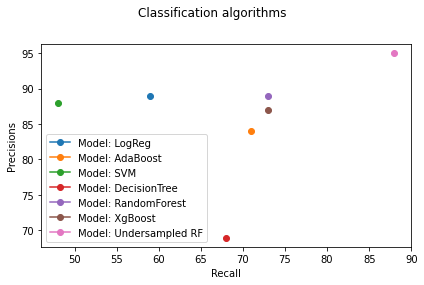

In [ ]:
#Plotting times,accuracies w.r.t model
models = ['LogReg', 'AdaBoost', 'SVM', 'DecisionTree', 'RandomForest', 'XgBoost','Undersampled RF' ]
precisions = [ 89, 84, 88, 69 , 89 , 87 ,95 ]
recalls = [59, 71, 48, 68 , 73 , 73 ,88 ]

fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(len(models)):
    ax.plot(recalls[i], precisions[i], marker='o',
            label='Model: %s' % models[i])
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precisions')
ax.legend()
fig.suptitle('Classification algorithms')
fig.tight_layout()
fig.subplots_adjust(top=0.85)

plt.show()